In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

df = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')
df.head(100)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,NaN
96,97,Female,36,Accountant,7.2,8,60,4,Normal,115/75,68,7000,NaN
97,98,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,NaN
98,99,Female,36,Teacher,7.1,8,60,4,Normal,115/75,68,7000,NaN


In [18]:
print(df.shape) # (374, 13)
print(df.dtypes)
df.info()

"""
개인 ID
성별 (Male/Female)
나이
직업
수면 시간
수면의 질
신체 활동 레벨
스트레스 수준
BMI 카테고리 (Normal/Overweight/Obese/Normal Weight) (정상/과체중/비만/정상 체중) => Normal/Normal Weight 하나로 합치는 전처리 필요
혈압
심박수
일일 단계
수면 장애 => NaN 전처리 필요
"""

(374, 13)
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-

'\n개인 ID\n성별 (Male/Female)\n나이\n직업\n수면 시간\n수면의 질\n신체 활동 레벨\n스트레스 수준\nBMI 카테고리 (Normal/Overweight/Obese/Normal Weight) (정상/과체중/비만/정상 체중) => Normal/Normal Weight 하나로 합치는 전처리 필요\n혈압\n심박수\n일일 단계\n수면 장애 => NaN 전처리 필요\n'

In [19]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [20]:
# 데이터 전처리
# 1. BMI Category 칼럼 : (Normal/Normal Weight) 값을 Normal로 하나로 통일
df['BMI Category'].unique() # 'Overweight', 'Normal', 'Obese', 'Normal Weight'

df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

df['BMI Category'].unique() # 'Overweight', 'Normal', 'Obese' -> 정상, 과체중, 비만

array(['Overweight', 'Normal', 'Obese'], dtype=object)

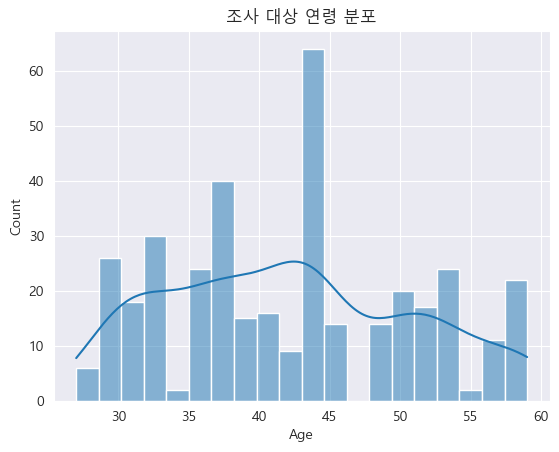

In [21]:
# 변수 분포 시각화

# 조사 대상 연령 분포
# 수치형 변수: 히스토그램 & 도수분포표(KDE)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('조사 대상 연령 분포')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

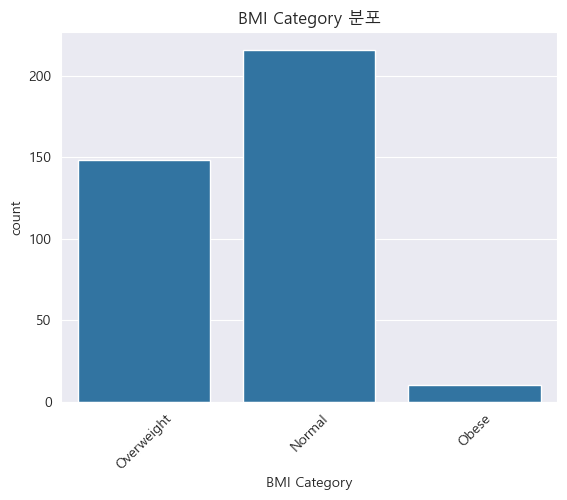

In [22]:
# BMI Category 분포
# 범주형 변수 분포 (막대그래프)
sns.countplot(data=df, x='BMI Category')
plt.title('BMI Category 분포')
plt.xticks(rotation=45)
plt.show()

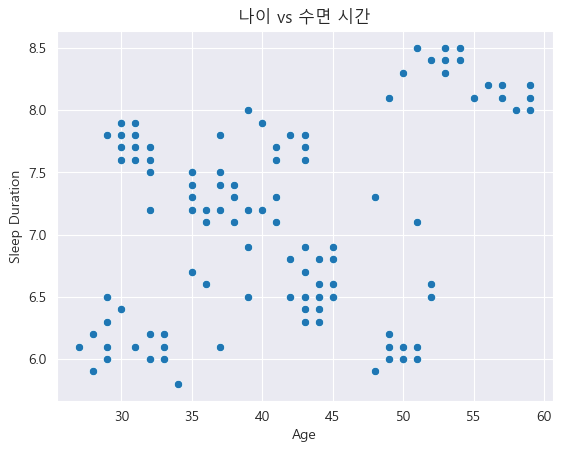

In [31]:
# 변수 간 관계 시각화

# Age와 Sleep Duration 간의 관계
sns.scatterplot(data=df, x='Age', y='Sleep Duration')
plt.title('나이 vs 수면 시간')
plt.show()

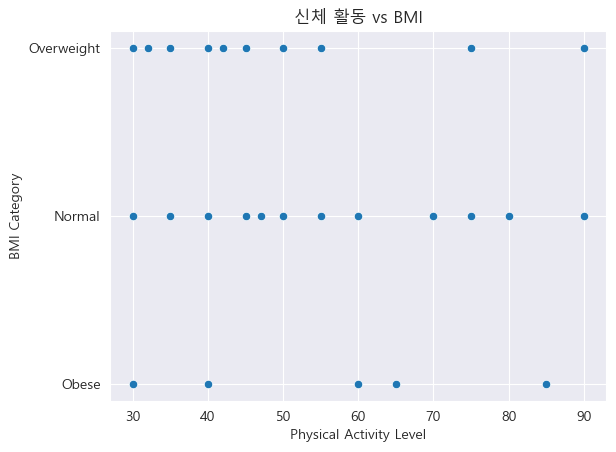

In [39]:
# BMI와 Physical Activity 간의 관계
sns.scatterplot(x='Physical Activity Level', y='BMI Category', data=df)
plt.title('신체 활동 vs BMI')
plt.show()

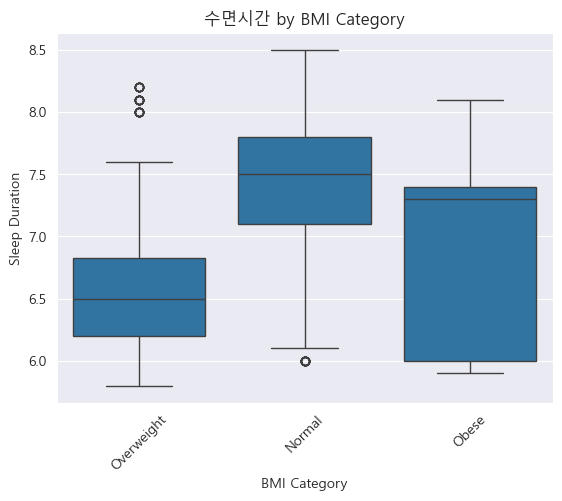

In [32]:
# BMI Category에 따른 Sleep Duration
sns.boxplot(data=df, x='BMI Category', y='Sleep Duration')
plt.title('수면시간 by BMI Category')
plt.xticks(rotation=45)
plt.show()

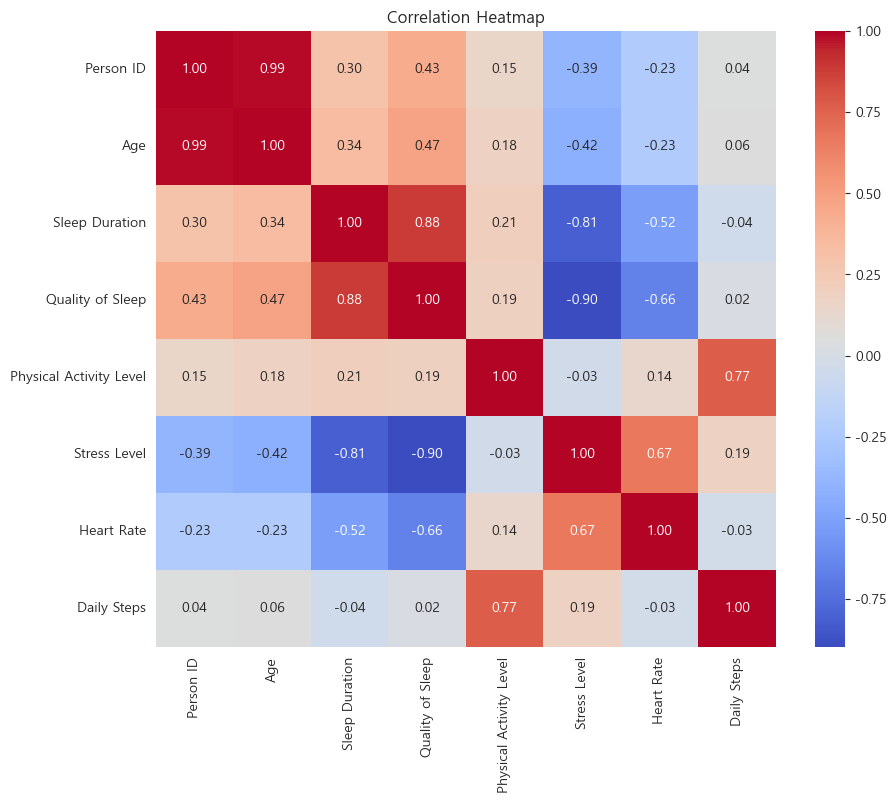

In [34]:
# 상관관계 및 교차분석
# 수치형 변수만 추출
numeric_df = df.select_dtypes(include=np.number)

# 상관행렬
corr = numeric_df.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

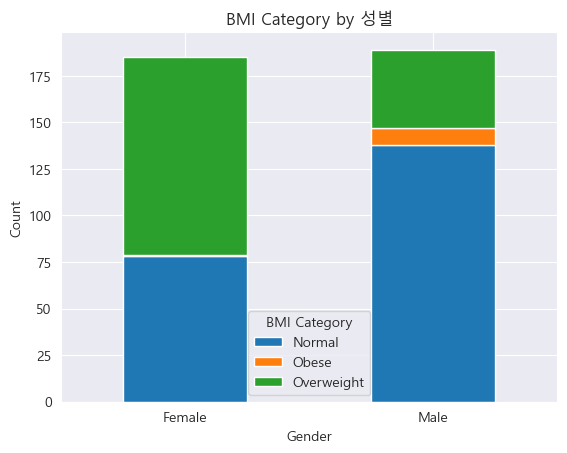

In [30]:
# Gender와 BMI Category 간의 교차 빈도
cross_tab = pd.crosstab(df['Gender'], df['BMI Category'])

# 스택형 막대그래프
cross_tab.plot(kind='bar', stacked=True)
plt.title('BMI Category by 성별')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='BMI Category')
plt.show()

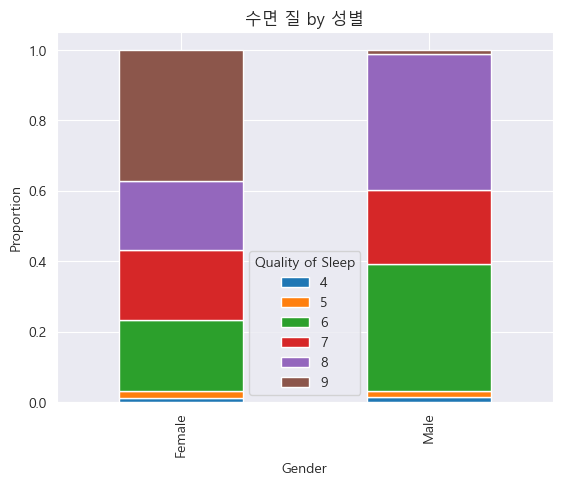

In [42]:
# 성별 vs 수면 질 교차분석
cross_tab = pd.crosstab(df['Gender'], df['Quality of Sleep'], normalize='index')
cross_tab.plot(kind='bar', stacked=True)
plt.title('수면 질 by 성별')
plt.ylabel('Proportion')
plt.show()

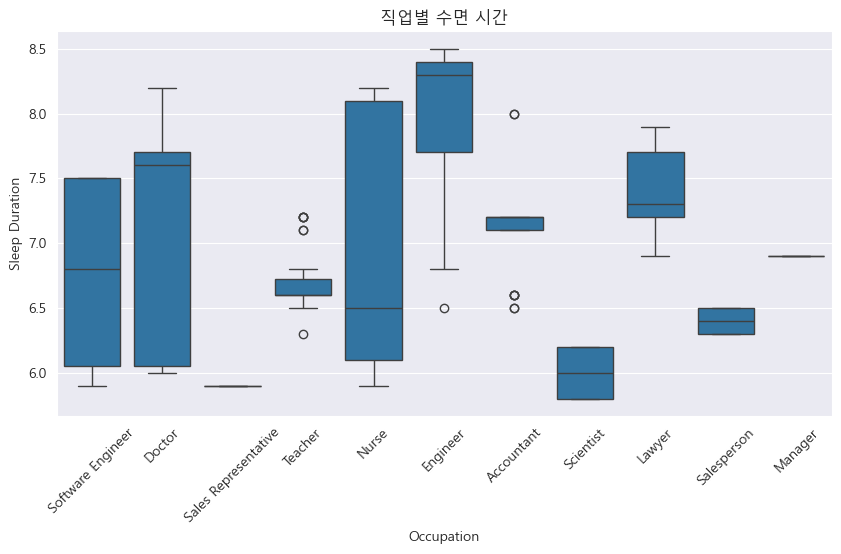

In [44]:
# 직업별 수면 시간 차이
plt.figure(figsize=(10, 5))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('직업별 수면 시간')
plt.xticks(rotation=45)
plt.show()

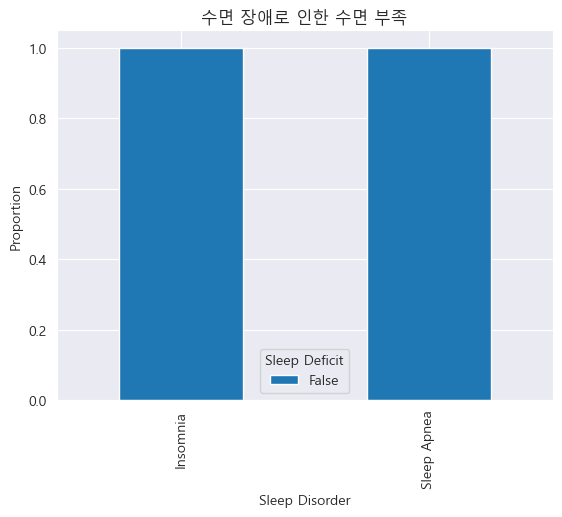

In [47]:
# 특성 공학 Feature Engineering 시각화

# 새로운 변수 생성
# 수면 부족 여부 추가 (5시간 미만은 부족)
df['Sleep Deficit'] = df['Sleep Duration'] < 5

# 교차표 (불면증 여부 vs 수면 부족 여부)
cross_tab = pd.crosstab(df['Sleep Disorder'], df['Sleep Deficit'], normalize='index')
cross_tab.plot(kind='bar', stacked=True)
plt.title('수면 장애로 인한 수면 부족')
plt.ylabel('Proportion')
plt.show()

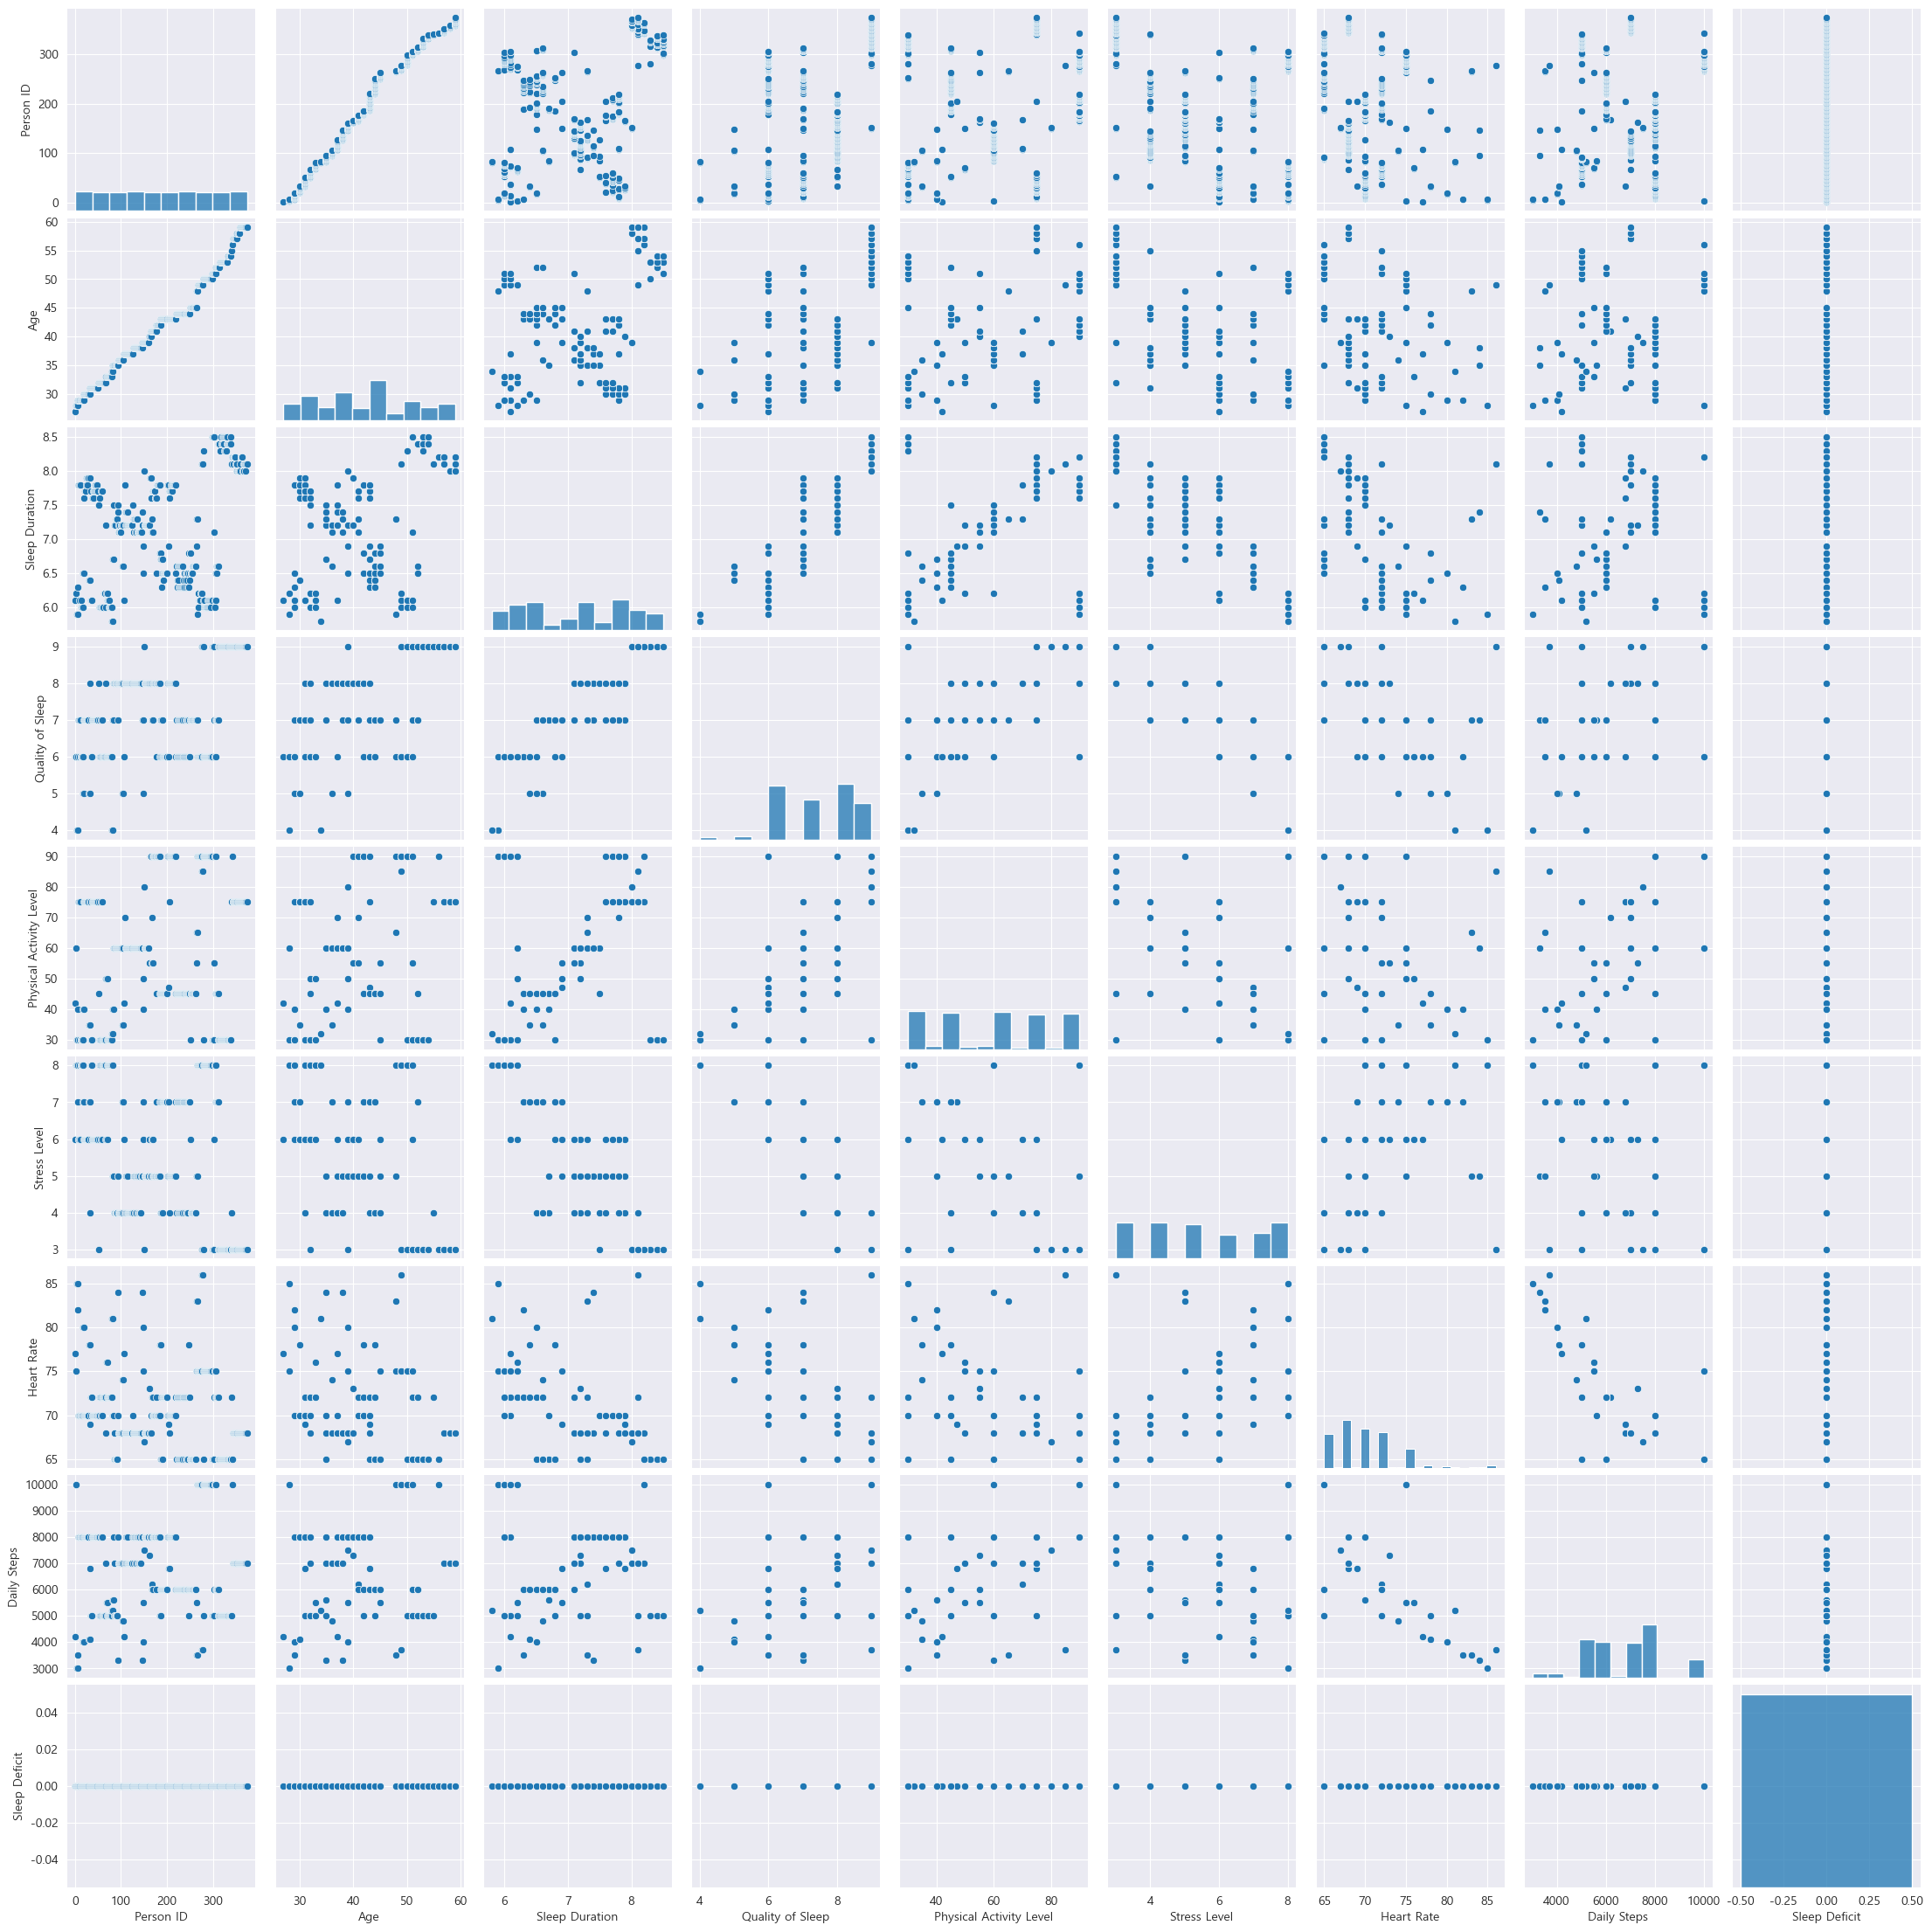

In [49]:
sns.pairplot(df) # 수치형 데이터만
plt.show()